<a href="https://colab.research.google.com/github/Vandanasprabhu/PRODIGY_GA_2/blob/main/Image_Generation_with_Pre_trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade diffusers transformers -q

In [ ]:
# Import the Necessary Libraries
import torch

from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed

In [ ]:
# Set up an Attribute Class TTI
class TTI:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (400,400)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt2"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [ ]:
# Use HuggingFace StableDiffusionPipeline
image_gen_model = StableDiffusionPipeline.from_pretrained(
    TTI.image_gen_model_id, torch_dtype = torch.float16,
    revision="fp16", guidance_scale=9
)

image_gen_model = image_gen_model.to(TTI.device)

vae/diffusion_pytorch_model.safetensors not found
Keyword arguments {'guidance_scale': 9} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stabilityai--stable-diffusion-2/snapshots/d75b612d366d802b1753960de862a9270c8d55f1/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:
# Define an Image Generation Function
def generate_image(prompt, model):
    image = model(
        prompt, num_inference_steps = TTI.image_gen_steps,
        generator = TTI.generator,
        guidance_scale = TTI.image_gen_guidance_scale
    ).images[0]

    image = image.resize(TTI.image_gen_size)

    return image

  0%|          | 0/35 [00:00<?, ?it/s]

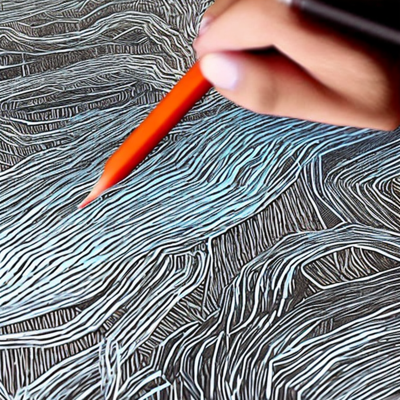

In [ ]:
# Test Image Generation
generate_image("AI drawing a picture", image_gen_model)